In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import torch
from torchvision.utils import make_grid, save_image

# DenseNet

In [8]:
sns.set(font_scale=2.5)
def retrieve_data(filename):
    data = np.load(os.path.join('plot_data', filename+'.npz'))
    outputs = data['outputs']
    ground_truths = data['ground_truths']
    return outputs, ground_truths

def plot_error_outputs(filename):
    plt.figure(figsize=(12,8))
    outputs, ground_truths = retrieve_data(filename)
    error = outputs - ground_truths[:, None, ...]
    error = error.reshape(error.shape[0], error.shape[1], -1)
    error = np.linalg.norm(error, axis=-1)
    delta = outputs[:, 1:, :] - outputs[:, :-1, :]
    delta = delta.reshape(delta.shape[0], delta.shape[1], -1)
    delta = np.linalg.norm(delta, axis=-1)
    mean_delta = np.mean(delta, axis=0)
    std_delta = np.std(delta, axis=0)
    mean_error = np.mean(error, axis=0)
    std_error = np.std(error, axis=0)
    
    plt.plot(np.r_[1:len(mean_error)+1], mean_error, '-', lw=6, color='r')
    plt.fill_between(np.r_[1:len(mean_error)+1], mean_error + std_error, mean_error - std_error, facecolor='r', alpha=0.5)
    plt.plot(np.r_[2:len(mean_error)+1], mean_delta, '--', lw=6, color='b')
    plt.fill_between(np.r_[2:len(mean_error)+1], mean_delta + std_delta, mean_delta - std_delta, facecolor='b', alpha=0.5)
    plt.xlim([0,100])
    plt.vlines(98, -20, 400, 'k', 'dashed', lw=8)
    plt.text(68, 420, 'Feedforward', fontsize=32)
    plt.xlabel('Parallel Iterations')
    plt.legend(['Difference from groud truth', 'Forward difference'])
        

def plot_log_error_outputs(filename):
    plt.figure(figsize=(12,8))
    outputs, ground_truths = retrieve_data(filename)
    error = outputs - ground_truths[:, None, ...]
    error = error.reshape(error.shape[0], error.shape[1], -1)
    error = np.linalg.norm(error, axis=-1)
    error = np.maximum(error, 1e-10)
    error = np.log10(error)
    delta = outputs[:, 1:, :] - outputs[:, :-1, :]
    delta = delta.reshape(delta.shape[0], delta.shape[1], -1)
    delta = np.linalg.norm(delta, axis=-1)
    delta = np.maximum(delta, 1e-10)
    delta = np.log10(delta)
    mean_delta = np.mean(delta, axis=0)
    std_delta = np.std(delta, axis=0)
    mean_error = np.mean(error, axis=0)
    std_error = np.std(error, axis=0)
    
    plt.plot(np.r_[1:len(mean_error)+1], mean_error, '-', lw=6, color='r')
    plt.fill_between(np.r_[1:len(mean_error)+1], mean_error + std_error, mean_error - std_error, facecolor='r', alpha=0.5)
    plt.plot(np.r_[2:len(mean_error)+1], mean_delta, '--', lw=6, color='b')
    plt.fill_between(np.r_[2:len(mean_error)+1], mean_delta + std_delta, mean_delta - std_delta, facecolor='b', alpha=0.5)
    plt.hlines(-10, 0, 100, 'k', 'dashed', label='', lw=6)
    plt.text(2, -9.5, '$-\infty$', fontsize=48)
    plt.vlines(98, -11, -4, 'k', 'dashed', lw=8)
    plt.text(68, -3.5, 'Feedforward', fontsize=32)
    
    plt.xlim([0,100])
    plt.xlabel('Parallel Iterations')
    plt.legend(['Difference from groud truth', 'Forward difference'])
    
def plot_error_predictions(filename):
    plt.figure(figsize=(12,8))
    outputs, ground_truths = retrieve_data(filename)
    outputs = np.argsort(outputs, axis=-1).squeeze()[...,:5]
    ground_truths = np.argsort(ground_truths, axis=-1).squeeze()[...,:5]
    error = np.sum(outputs != ground_truths[:, None, ...], axis=-1)

    error = error.reshape(error.shape[0], error.shape[1], -1)
    error = np.linalg.norm(error, axis=-1)
    delta = np.sum(outputs[:, 1:, :] != outputs[:, :-1, :], axis=-1)
    delta = delta.reshape(delta.shape[0], delta.shape[1], -1)
    delta = np.linalg.norm(delta, axis=-1)
    mean_delta = np.mean(delta, axis=0)
    std_delta = np.std(delta, axis=0)
    mean_error = np.mean(error, axis=0)
    std_error = np.std(error, axis=0)
    
    plt.plot(np.r_[1:len(mean_error)+1], mean_error, '-', lw=6, color='r')
    plt.fill_between(np.r_[1:len(mean_error)+1], mean_error + std_error, mean_error - std_error, facecolor='r', alpha=0.5)
    plt.plot(np.r_[2:len(mean_error)+1], mean_delta, '--', lw=6, color='b')
    plt.fill_between(np.r_[2:len(mean_error)+1], mean_delta + std_delta, mean_delta - std_delta, facecolor='b', alpha=0.5)
    plt.xlim([0,100])
    plt.vlines(98, -0.5, 2.2, 'k', 'dashed', lw=8)
    plt.text(68, 2.5, 'Feedforward', fontsize=32)
    plt.xlabel('Parallel Iterations')
    plt.legend(['Difference from groud truth', 'Forward difference'])
    

def plot_error_predictions_vs_time():
    plt.figure(figsize=(12,8))
    data = np.load(os.path.join('plot_data', 'densenet.npz'))
    outputs = data['outputs']
    ground_truths = data['ground_truths']
    all_times = data['all_times']
    ub = all_times.sum(axis=-1).mean()
    unit = all_times.max(axis=-1).mean()    
    
    outputs = np.argsort(outputs, axis=-1).squeeze()[...,:5]
    ground_truths = np.argsort(ground_truths, axis=-1).squeeze()[...,:5]
    error = np.sum(outputs != ground_truths[:, None, ...], axis=-1)

    error = error.reshape(error.shape[0], error.shape[1], -1)
    error = np.linalg.norm(error, axis=-1)
    delta = np.sum(outputs[:, 1:, :] != outputs[:, :-1, :], axis=-1)
    delta = delta.reshape(delta.shape[0], delta.shape[1], -1)
    delta = np.linalg.norm(delta, axis=-1)
    mean_delta = np.mean(delta, axis=0)
    std_delta = np.std(delta, axis=0)
    mean_error = np.mean(error, axis=0)
    std_error = np.std(error, axis=0)
    
    plt.plot(np.r_[1:len(mean_error)+1] * unit, mean_error, '-', lw=6, color='r')
    plt.fill_between(np.r_[1:len(mean_error)+1] * unit, mean_error + std_error, mean_error - std_error, facecolor='r', alpha=0.5)
    plt.plot(np.r_[2:len(mean_error)+1] * unit, mean_delta, '--', lw=6, color='b')
    plt.fill_between(np.r_[2:len(mean_error)+1] * unit, mean_delta + std_delta, mean_delta - std_delta, facecolor='b', alpha=0.5)
    plt.xlim([0,ub])
    plt.vlines(ub, -0.5, 2.2, 'k', 'dashed', lw=8)
    plt.text(ub * 68/98, 2.5, 'Feedforward', fontsize=32)
    plt.xlabel('Estimated Time (s)')
    plt.ylabel('Diff. in Top-5 Predictions')
    plt.legend(['Difference from groud truth', 'Forward difference'])
    
    converge_steps = (np.sum(np.cumprod(error != 0., axis=-1), axis=-1) + 1).max()
    print(f"Jacobi-GS time: {unit * converge_steps}, feedforward time: {ub}")

(0, 98)

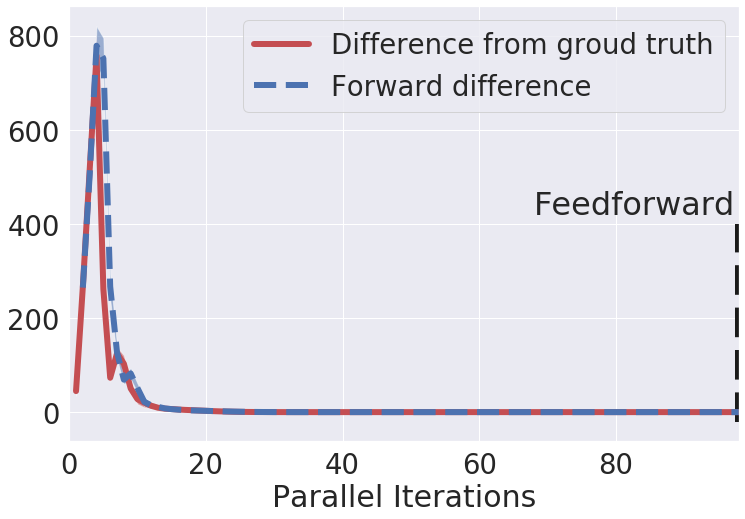

In [4]:
plot_error_outputs('densenet')
plt.xlim([0,98])

(0, 98)

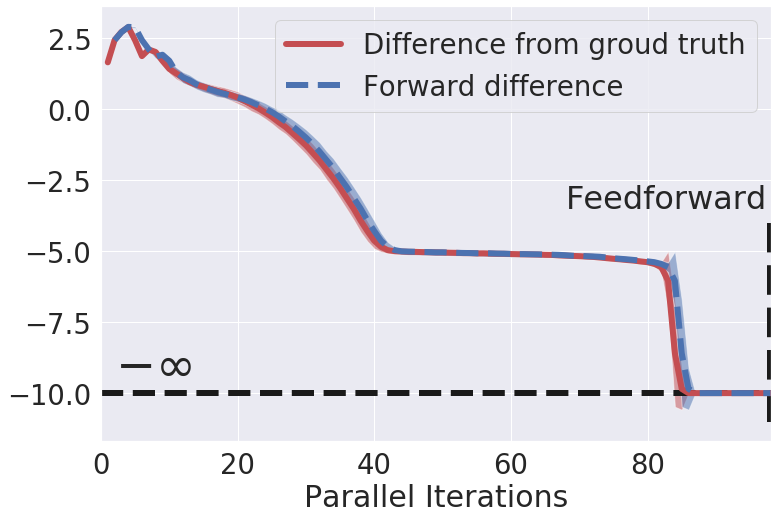

In [5]:
plot_log_error_outputs('densenet')
plt.xlim([0,98])

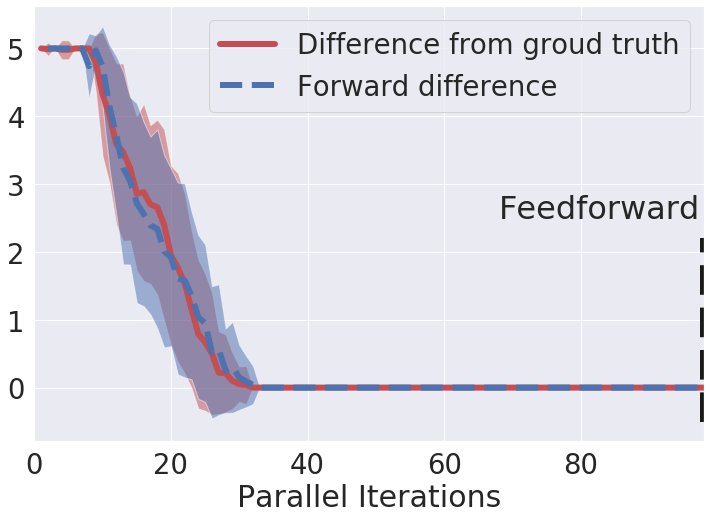

In [6]:
plot_error_predictions('densenet')
plt.xlim([0,98])
plt.savefig('densenet_iter.png', dpi=150, bbox_inches='tight')

Jacobi-GS time: 0.013073616981506346, feedforward time: 0.027854736566543584


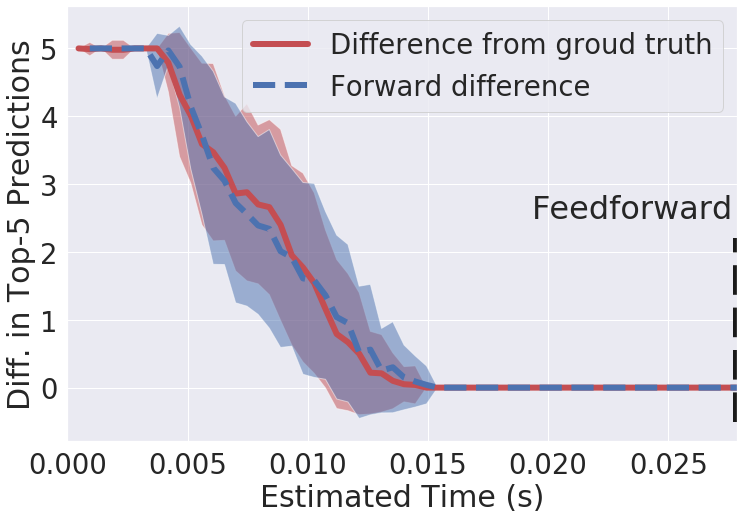

In [9]:
plot_error_predictions_vs_time()
plt.savefig('densenet.png', dpi=150, bbox_inches='tight')